<span style="font-family: Arial; font-size: 35px;">Introduction</span>

<span style="font-family: Arial; font-size: 14px;">The following datasets are being used for the EDA:</span>

<span style="font-family: Arial; font-size: 14px;">instacart_orders.csv: This dataset contains details of orders placed on the Instacart app. Each row corresponds to a single order and includes fields such as 'order_id' (a unique identifier for each order), 'user_id' (a unique identifier for each customer account), 'order_number' (the number of times a customer has placed an order), 'order_dow' (the day of the week when the order was placed, with 0 representing an uncertain day), 'order_hour_of_day' (the hour when the order was placed), and 'days_since_prior_order' (the number of days since the customer's previous order).

    products.csv: This dataset provides information about unique products that customers can purchase. It includes 'product_id' (a unique identifier for each product), 'product_name' (the name of the product), 'aisle_id' (a unique identifier for grocery aisle categories), and 'department_id' (a unique identifier for grocery department categories).

    order_products.csv: This dataset offers a detailed view of individual items within each order. It contains information about the order ('order_id'), the product ('product_id'), 'add_to_cart_order' (the sequential order in which each item was placed in the cart), and 'reordered' (a binary indicator, with 0 indicating that the customer has never ordered the product before, and 1 indicating that they have).

    aisles.csv: This dataset provides a mapping of 'aisle_id' to the name of the grocery aisle, helping to categorize products and explore shopping trends within different aisles.

    departments.csv: Similarly, this dataset maps 'department_id' to the name of the grocery department, offering insights into department-specific shopping patterns.
    
    instacart_orders.csv: This dataset contains details of orders placed on the Instacart app. Each row corresponds to a single order and includes fields such as 'order_id' (a unique identifier for each order), 'user_id' (a unique identifier for each customer account), 'order_number' (the number of times a customer has placed an order), 'order_dow' (the day of the week when the order was placed, with 0 representing an uncertain day), 'order_hour_of_day' (the hour when the order was placed), and 'days_since_prior_order' (the number of days since the customer's previous order).

The objective of reviewing these datasets is to conduct exploratory data analysis (EDA) and uncover valuable insights that can enhance our understanding of customer behavior, product preferences, and the dynamics of online grocery shopping. Through this analysis, we aim to identify trends, patterns, and opportunities for improvement in the Instacart shopping experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [7]:
# renaming columns
df.columns=df.columns.str.lower() # All characters must be lowercase
df.columns=df.columns.str.replace(' ','') # Delete spaces
df # Print column

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [8]:
df.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [9]:
# Fill missing values in 'days_since_prior_order' column with 'unknown'
df['days_since_prior_order']=df['days_since_prior_order'].fillna('unknown')
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Results: The main steps taken in this section was to review the data. I added a seperation at the beginning as the data was otherwise very hard to read. Additionally I cleared out missing values in days_since_prior_order. The data is now cleaner looking.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [10]:
# Check for duplicated orders

# Columns to check for duplicates
subset_cols = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

# Duplicated orders based on the specified columns
duplicates = df.duplicated(subset=subset_cols)

# Display the rows that are duplicates
duplicate_orders = df[duplicates]

# Display the duplicate orders
display(duplicate_orders)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,unknown
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,unknown


In [11]:
# Reviwer's code 2

df[df.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,unknown
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,unknown


In [12]:
# Check for all orders placed Wednesday at 2:00 AM

# Convert the 'order_dow' and 'order_hour_of_day' columns to integers
df['order_dow'] = df['order_dow'].astype(int)
df['order_hour_of_day'] = df['order_hour_of_day'].astype(int)

# Filter orders placed on Wednesday (order_dow == 3) at 2:00 AM (order_hour_of_day == 2)
wednesday_2am_orders = df[(df['order_dow'] == 3) & (df['order_hour_of_day'] == 2)]

# Display the filtered orders
display(wednesday_2am_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [13]:
# Reviewer's code

display(wednesday_2am_orders.head(3))

wednesday_2am_orders.tail(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0
477526,2592344,46860,38,3,2,3.0


In [14]:
# Remove duplicate orders
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
# Double check for duplicate rows
df.duplicated().sum()

0

In [16]:
# Double check for duplicate order IDs only
duplicate_order_ids = df[df.duplicated(subset='order_id', keep=False)]
print(duplicate_order_ids)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In this section I first checked for duplicated rows. I dropped all additional duplicates, and checked for order ID duplication where we can see an empty dataframe.

### `products` data frame

In [17]:
df2 = pd.read_csv('/datasets/products.csv', sep=';')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
df2.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [20]:
df2.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
# Print fully duplicate rows
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [22]:
# Reviwer's code 2

df[df.duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [23]:
# Check for just duplicate product IDs
duplicate_product_ids = df2[df2.duplicated(subset='product_id', keep=False)]

# Display rows with duplicate product IDs
print(duplicate_product_ids)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [24]:
df2[df2['product_name'].str.lower().duplicated()] # I do not use keep=False

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [25]:
# Check for duplicate product names (case-insensitive, excluding rows with missing product names)
df2['product_name_lower'] = df2['product_name'].str.lower()  # Create a new column with lowercase product names
duplicate_product_names = df2[df2.duplicated(subset='product_name_lower', keep=False) & df2['product_name'].notna()]

# Display rows with duplicate product names (excluding rows with missing product names)
display(duplicate_product_names)

,product_id,product_name,aisle_id,department_id,product_name_lower
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
515,516,American Cheese Slices,21,16,american cheese slices
1538,1539,Cauliflower head,83,4,cauliflower head
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19,nutrition protein mix blueberry nut
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [26]:
# Check for NaN values in the entire DataFrame
nan_check = df2.isna().any().any()

if not nan_check:
    print("No NaN values found in the DataFrame.")
else:
    print("There are still NaN values in the DataFrame.")

There are still NaN values in the DataFrame.


In [27]:
df2 = df2.dropna()
df2 = df2.fillna('Unknown')

In [28]:
# Check for NaN values in the entire DataFrame
nan_check = df2.isna().any().any()

if not nan_check:
    print("No NaN values found in the DataFrame.")
else:
    print("There are still NaN values in the DataFrame.")

No NaN values found in the DataFrame.


Results: I cleaned the data on the products CSV. Additionally I cleaned the CSV with a seperator.

### `departments` data frame

In [57]:


# Read the data from the CSV file with semicolon delimiter
df3 = pd.read_csv('/datasets/departments.csv', sep=';')


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [59]:
# Display the DataFrame with both columns
display(df3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [60]:
# Check for Duplicates

# Check for duplicate rows
duplicate_rows = df3[df3.duplicated()]

# Display the duplicate rows
display(duplicate_rows)

,department_id,department


I cleaned the dataframe here by creating a seperator. Additionally I noticed once data was created it was very spaced so I fixed it so the columns would be uniform with the results.

### `aisles` data frame

In [61]:
df4 = pd.read_csv('/datasets/aisles.csv', sep=';')

In [62]:
df4.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [63]:
df4.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [64]:
print(df4.duplicated().any())
print(df4['aisle_id'].duplicated().any())

False
False


Cleaned Dataframe by adding a seperator. Checked for any duplicates in dataframe.

### `order_products` data frame

In [65]:
df5 = pd.read_csv('/datasets/order_products.csv', sep=';')

In [66]:
df5.isnull().sum()

# Get unique values in the 'add_to_cart_order' column
unique_add_to_cart_order = df5['add_to_cart_order'].unique()

# Display the unique values
print(unique_add_to_cart_order)

[17.  1. 35.  5.  4. 10. 14.  2. 28.  3. 16.  8.  7.  6.  9. 15. 22. 49.
 19. 13. 11. 12. 18. 24. 23. 45. 30. 31. 29. 21. 38. 20. 57. 58. 26. 25.
 39. 34. 40. 27. nan 43. 33. 42. 50. 32. 36. 37. 61. 46. 56. 41. 44. 55.
 54. 47. 63. 48. 60. 62. 53. 59. 52. 51. 64.]


In [67]:
# Check for fully duplicate rows
duplicate_rows = df5[df5.duplicated(keep=False)]

# Display fully duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [68]:
# Double check for any other tricky duplicates

# Define a composite key (combination of columns to identify duplicates)
composite_key = ['order_id', 'product_id']

# Find tricky duplicates based on the composite key
composite_key = df5[df5.duplicated(subset=composite_key, keep=False)]

# Display the tricky duplicates
print(composite_key)


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [69]:
# Reviewer's code 

df5[df5.duplicated(subset=['order_id', 'product_id'], keep=False)]

,order_id,product_id,add_to_cart_order,reordered


I cleaned up the dataframe. Changed missing sums in add_to_cart_order to 0 as it made the most sense. Checked for duplicates and did not find any.

## Find and remove missing values


### `products` data frame

In [70]:
df2.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [71]:
df2.isnull().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [72]:
# Are all of the missing product names associated with aisle ID 100?
# Check if 'product_name' is missing (NaN) and 'aisle_id' is 100
missing_product_names_with_aisle_100 = df2[(df2['product_name'].isna()) & (df2['aisle_id'] == 100)]

# Check if all missing product names are associated with aisle ID 100
aisle_100 = len(missing_product_names_with_aisle_100) == len(df2[df2['product_name'].isna()])

# Print the result
print(aisle_100)

True


In [73]:
# Are all of the missing product names associated with department ID 21?
# Check if 'product_name' is missing (NaN) and 'department_id' is 21
missing_product = df2[(df2['product_name'].isna()) & (df2['department_id'] == 21)]

# Check if all missing product names are associated with department ID 21
department_21 = len(missing_product) == len(df2[df2['product_name'].isna()])

# Print the result
print(department_21)

True


In [74]:
# What is this ailse and department?
# Filter rows where 'product_name' is missing (NaN)
missing_product_names = df2[df2['product_name'].isna()]

# Display the 'aisle_id' and 'department_id' values for the missing product names
print(missing_product_names[['aisle_id', 'department_id']])

       aisle_id  department_id
37          100             21
71          100             21
109         100             21
296         100             21
416         100             21
...         ...            ...
49552       100             21
49574       100             21
49640       100             21
49663       100             21
49668       100             21

[1258 rows x 2 columns]


In [75]:
# Fill missing product names with 'Unknown'
# Fill missing values in 'product_name' column with 'unknown'
df2['product_name']=df2['product_name'].fillna('Unknown')
df2.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Based off the information we found that all missing values were associated to department 21 and aisle 100. I changed the missing value to Unknown.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment ✔️</h2>
    
Correct. </div>

### `orders` data frame

In [76]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [77]:
# Are there any missing values where it's not a customer's first order?
# Check for missing values in 'days_since_prior_order' for orders where 'order_number' is greater than 1
missing_values = df.loc[df['order_number'] > 1, 'days_since_prior_order'].isna().sum()

if missing_values > 0:
    print(f"There are {missing_values} missing values in 'days_since_prior_order' for orders where it's not the customer's first order.")
else:
    print("There are no missing values in 'days_since_prior_order' for orders where it's not the customer's first order.")

There are no missing values in 'days_since_prior_order' for orders where it's not the customer's first order.


There was a cleaning previously in preprocessing. However there were no missing values for a customer that did not have their first order.

### `order_products` data frame

In [78]:
df5.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [79]:
# What are the min and max values in this column?
# Find the minimum and maximum values in the 'add_to_cart_order' column
min_value = df5['add_to_cart_order'].min()
max_value = df5['add_to_cart_order'].max()

print(f"Minimum value in 'add_to_cart_order': {min_value}")
print(f"Maximum value in 'add_to_cart_order': {max_value}")

Minimum value in 'add_to_cart_order': 1.0
Maximum value in 'add_to_cart_order': 64.0


In [80]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# Filter the DataFrame to select rows with missing values in 'add_to_cart_order'
missing_values_orders = df5[df5['add_to_cart_order'].isna()]

# Extract the unique order IDs from the filtered DataFrame
order_ids_with_missing_values = missing_values_orders['order_id'].unique()

# Print or save the order IDs
print("Order IDs with at least one missing value in 'add_to_cart_order':")
print(order_ids_with_missing_values)

Order IDs with at least one missing value in 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [81]:
# Find unique 'order_id' values with missing 'add_to_cart_order'
order_ids = df5.loc[df5['add_to_cart_order'].isna(), 'order_id'].unique()

# Check if all orders with missing values have more than 64 products
more_than_64 = all(
    df5.loc[df5['order_id'].isin(order_ids)]
    .groupby('order_id')['product_id']
    .count()
    .gt(64)
)

if more_than_64:
    print("All orders with missing values have more than 64 products.")
else:
    print("Not all orders with missing values have more than 64 products.")

All orders with missing values have more than 64 products.


In [82]:
# Reviewer's code 3

df5[df5['order_id'].isin(order_ids_with_missing_values)].groupby('order_id').size().min()

65

In [53]:
# Replace missing values with 999 and convert column to integer type

# Replace missing values with 999
df5['add_to_cart_order'] = df5['add_to_cart_order'].fillna(999)

# Convert the column to an integer type
df5['add_to_cart_order'] = df5['add_to_cart_order'].astype(int)

# Get unique values in the 'add_to_cart_order' column
unique_add_to_cart_order = df5['add_to_cart_order'].unique()

# Display the unique values
print(unique_add_to_cart_order)

[ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]


As I cleaned the file earlier I updated the earlier null to 999. It was found that all orders with missing values do have more then 64 products.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [54]:
# Get unique values of 'order_dow' and 'order_hour_of_day'
unique_order_dow = df['order_dow'].unique()
unique_order_hour_of_day = df['order_hour_of_day'].unique()

# Print unique values of 'order_dow'
print("Unique values of 'order_dow':")
print(unique_order_dow)

# Print unique values of 'order_hour_of_day'
print("\nUnique values of 'order_hour_of_day':")
print(unique_order_hour_of_day)

Unique values of 'order_dow':
[6 5 0 4 3 1 2]

Unique values of 'order_hour_of_day':
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [55]:
# Check unique values in 'order_hour_of_day' and 'order_dow' columns
unique_order_hours = df['order_hour_of_day'].unique()
unique_order_dow = df['order_dow'].unique()

# Verify the ranges
if set(unique_order_hours) == set(range(24)) and set(unique_order_dow) == set(range(7)):
    print("The 'order_hour_of_day' and 'order_dow' values are sensible.")
else:
    print("The 'order_hour_of_day' and/or 'order_dow' values are not sensible.")

The 'order_hour_of_day' and 'order_dow' values are sensible.


Based on the data provided we can see that our hours and day of the week metrics are all in line and do not have any results that do not make sense.

### [A2] What time of day do people shop for groceries?

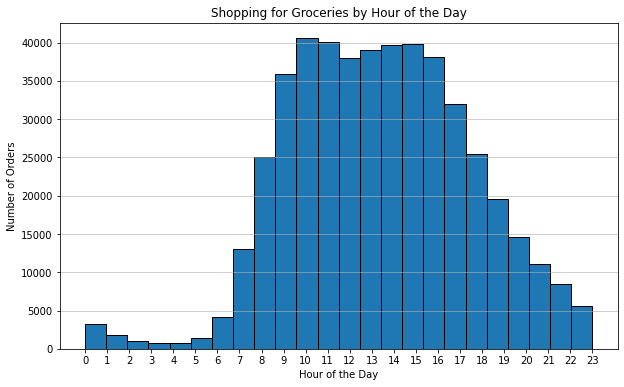

In [56]:
# Create a histogram of order_hour_of_day
plt.figure(figsize=(10, 6))
df['order_hour_of_day'].plot.hist(bins=24, edgecolor='k')
plt.title('Shopping for Groceries by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

Given the data shown. It appears that shoppers  have their peak time of shopping between 9 AM - 5 PM.

### [A3] What day of the week do people shop for groceries?

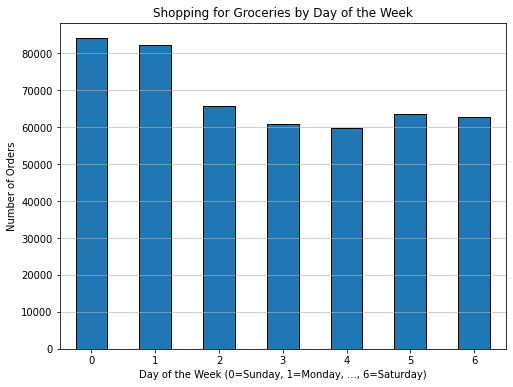

In [57]:
# Create a bar plot of order_dow (day of the week)
plt.figure(figsize=(8, 6))
df['order_dow'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title('Shopping for Groceries by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 1=Monday, ..., 6=Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

Given the data shown, it appears the day most common for shopping is Sunday followed very closely by Monday.

### [A4] How long do people wait until placing another order?

float64
[30.  9.  2. 10. 17. 15. 22.  4.  8.  3. 12. 11.  7.  1.  5.  6. 14. nan
 20. 16. 24. 23. 27. 13.  0. 28. 21. 25. 19. 18. 29. 26.]


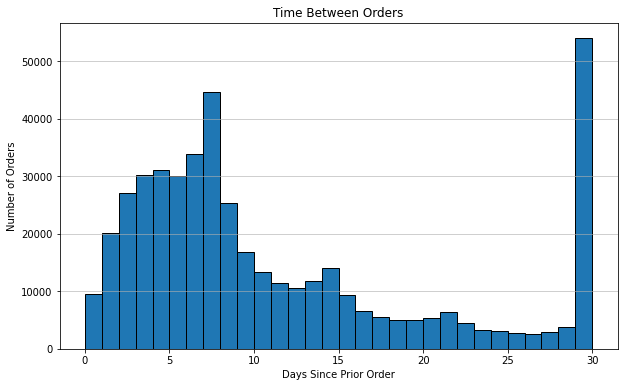

Summary Statistics for 'days_since_prior_order':
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


In [97]:
# Convert the 'days_since_prior_order' column to numeric, replacing non-numeric values with NaN
df['days_since_prior_order'] = pd.to_numeric(df['days_since_prior_order'], errors='coerce')

# Verify the data type and check unique values again
print(df['days_since_prior_order'].dtype)
print(df['days_since_prior_order'].unique())

# Calculate summary statistics for 'days_since_prior_order'
summary_stats = df['days_since_prior_order'].describe()

# Create a histogram to visualize the distribution of 'days_since_prior_order'
plt.figure(figsize=(10, 6))
df['days_since_prior_order'].plot.hist(bins=30, edgecolor='k')
plt.title('Time Between Orders')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Print summary statistics
print("Summary Statistics for 'days_since_prior_order':")
print(summary_stats)

Given the data provided, we can see that generally the time between orders is either 30 days(Monthly) or 7 days(weekly).

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [59]:
# Filter orders for Wednesdays and Saturdays
wednesday_orders = df[df['order_dow'] == 3]  # 3 corresponds to Wednesday
saturday_orders = df[df['order_dow'] == 6]   # 6 corresponds to Saturday

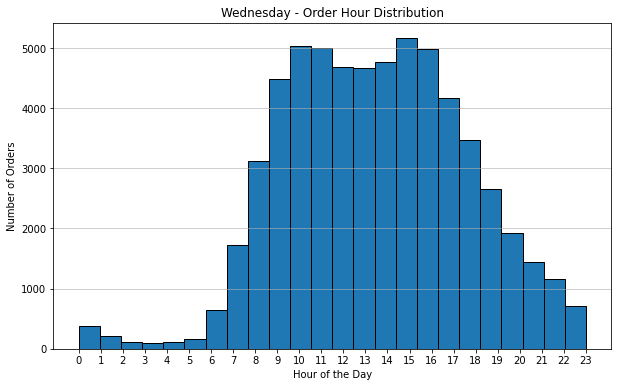

In [60]:
plt.figure(figsize=(10, 6))
wednesday_orders['order_hour_of_day'].plot.hist(bins=24, edgecolor='k')
plt.title('Wednesday - Order Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.75)


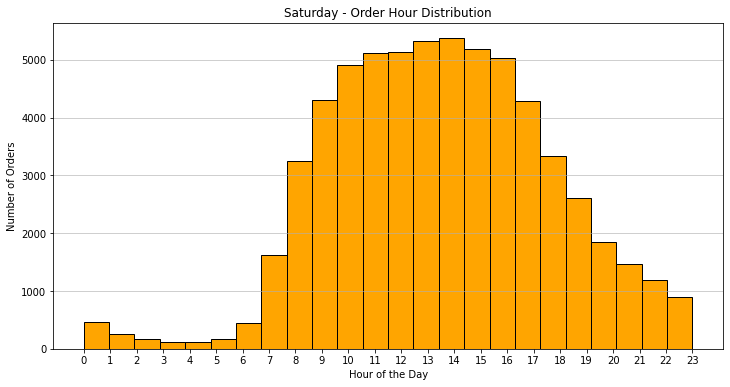

In [61]:
plt.figure(figsize=(12, 6))
saturday_orders['order_hour_of_day'].plot.hist(bins=24, edgecolor='k', color='orange')
plt.title('Saturday - Order Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.75)

# Show the plots
plt.show()

Given the data provided we can see that peak ordering time on Wednesday is about 3 pm while on Satuday it is 2 PM. There is no heavy difference between the ordering times of both days however.

### [B2] What's the distribution for the number of orders per customer?

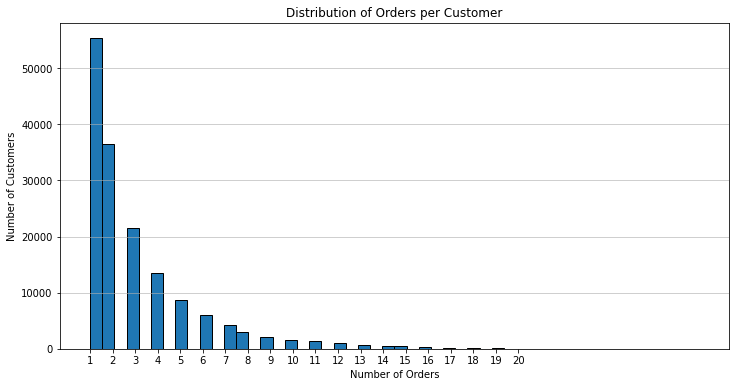

In [62]:
# Count the number of orders per customer
orders_per_customer = df['user_id'].value_counts()

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(orders_per_customer, bins=50, edgecolor='k')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(range(1, 21))  # Set x-axis ticks from 1 to 20
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

From the data provided we can see that generally the distribution is 1 order per customer, with a slight following of 2 orders at around 35000 customers.

### [B3] What are the top 20 popular products (display their id and name)?

In [63]:
df2.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [64]:
df5.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [65]:
# Merge df5 with df2 on the 'product_id' column
merged_df = df5.merge(df2, on='product_id', how='inner')

In [66]:
# Group by product_id and product_name, count the occurrences, and sort in descending order
product_counts = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='count')
product_counts = product_counts.sort_values(by='count', ascending=False)

In [67]:
# Display the top 20 popular products with frequency
top_20_products = product_counts.head(20)
print(top_20_products[['product_id', 'product_name', 'count']])

       product_id              product_name  count
22808       24852                    banana  66050
12025       13176    bag of organic bananas  53297
19370       21137      organic strawberries  37039
20077       21903      organic baby spinach  33971
43271       47209      organic hass avocado  29773
43788       47766           organic avocado  24689
43663       47626               large lemon  21495
15364       16797              strawberries  20018
24047       26209                     limes  19690
25556       27845        organic whole milk  19600
25666       27966       organic raspberries  19197
21025       22935      organic yellow onion  15898
22908       24964            organic garlic  15292
41244       45007          organic zucchini  14584
35996       39275       organic blueberries  13879
45561       49683            cucumber kirby  13675
25889       28204        organic fuji apple  12544
5375         5876             organic lemon  12232
7543         8277  apple honeyc

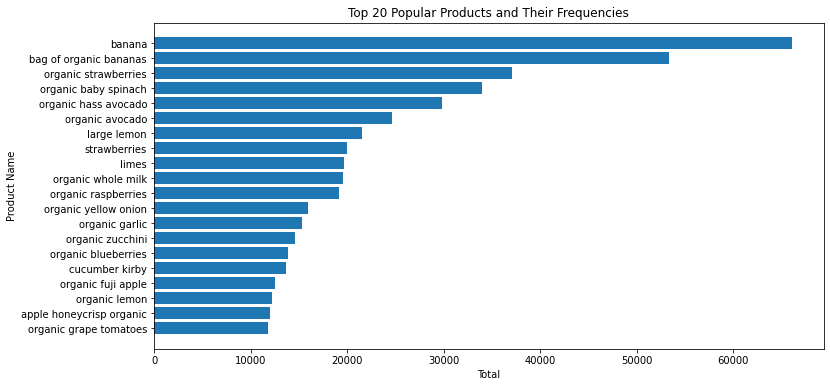

In [68]:
# Plot the top 20 popular products
plt.figure(figsize=(12, 6))
plt.barh(top_20_products['product_name'], top_20_products['count'])
plt.xlabel('Total')
plt.ylabel('Product Name')
plt.title('Top 20 Popular Products and Their Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular product at the top
plt.show()

From the data provided we can see our top 20 products with Bananas at number 1. To accomplish this we needed 2 merge our 2 dataframes of order_products.csv and products.csv

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [69]:
df5.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [70]:
# Group by order_id and count the number of products in each order
items_per_order = df5.groupby('order_id')['product_id'].count()

In [71]:
# Calculate the distribution of the number of items per order
items_per_order_distribution = items_per_order.value_counts().reset_index()
items_per_order_distribution.columns = ['Number of Items', 'Number of Orders']


In [72]:
# Sort by the number of items in ascending order
items_per_order_distribution = items_per_order_distribution.sort_values(by='Number of Items')

In [73]:
# Calculate the mean and median
mean_items_per_order = items_per_order.mean()
median_items_per_order = items_per_order.median()

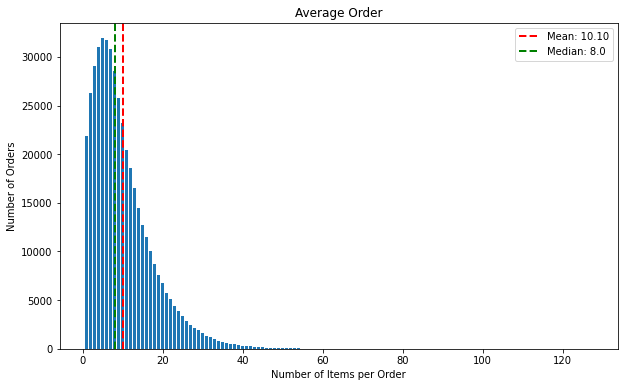

In [74]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(items_per_order_distribution['Number of Items'], items_per_order_distribution['Number of Orders'])
plt.xlabel('Number of Items per Order')
plt.ylabel('Number of Orders')
plt.title('Average Order')
plt.axvline(mean_items_per_order, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_items_per_order:.2f}')
plt.axvline(median_items_per_order, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_items_per_order}')
plt.legend()
plt.show()

From the data provided we can see the average number ordered is 10.1 in 1 order. Additionally our Median is 8. So we can see that generally the average for orders are hovering around those areas.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [75]:
# Merge df5 with df2 to get product names
merged_df = df5.merge(df2, on='product_id', how='inner')

In [76]:
# Filter for rows where products were reordered (reordered == 1)
reordered_products = merged_df[merged_df['reordered'] == 1]

In [77]:
# Group by product_id and product_name, count the occurrences, and sort in descending order
reordered_counts = reordered_products.groupby(['product_id', 'product_name']).size().reset_index(name='count')
reordered_counts = reordered_counts.sort_values(by='count', ascending=False)

In [78]:
# Display the top 20 items that are reordered most frequently with product names
top_20_reordered = reordered_counts.head(20)
print(top_20_reordered[['product_id', 'product_name', 'count']])

       product_id              product_name  count
18104       24852                    banana  55763
9528        13176    bag of organic bananas  44450
15368       21137      organic strawberries  28639
15936       21903      organic baby spinach  26233
34407       47209      organic hass avocado  23629
34828       47766           organic avocado  18743
20285       27845        organic whole milk  16251
34725       47626               large lemon  15044
20375       27966       organic raspberries  14748
12193       16797              strawberries  13945
19088       26209                     limes  13327
16700       22935      organic yellow onion  11145
18186       24964            organic garlic  10411
32792       45007          organic zucchini  10076
36219       49683            cucumber kirby   9538
20543       28204        organic fuji apple   8989
5978         8277  apple honeycrisp organic   8836
28607       39275       organic blueberries   8799
4267         5876             o

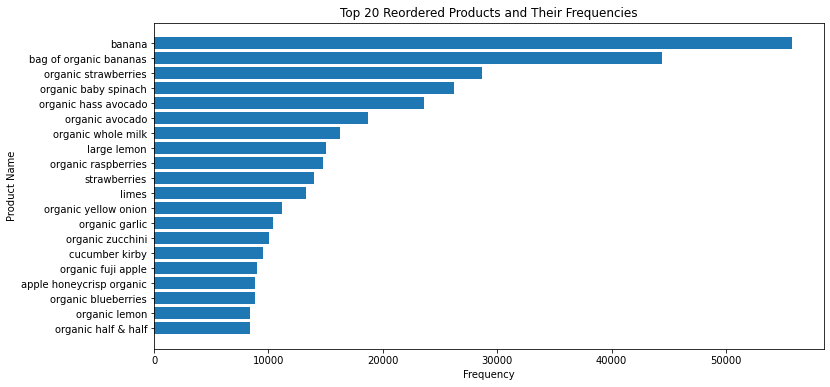

In [79]:
# Create a bar chart to visualize the top 20 reordered items
plt.figure(figsize=(12, 6))
plt.barh(top_20_reordered['product_name'], top_20_reordered['count'])
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title('Top 20 Reordered Products and Their Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most reordered product at the top
plt.show()

I have added a list of the 20 most reordered items. Bananas once again being our highest and most popular reorder for items. I added a visual additionally to view this clearer.

### [C3] For each product, what proportion of its orders are reorders?

In [80]:
# Merge df5 with df2 to get product names
merged_df = df5.merge(df2, on='product_id', how='inner')

In [81]:
# Calculate the total number of orders for each product
total_orders = merged_df.groupby(['product_id', 'product_name'])['order_id'].nunique()

In [82]:
# Calculate the number of reorder events for each product
reorder_product = merged_df.groupby(['product_id', 'product_name'])['reordered'].sum()

In [83]:
# Calculate the proportion of orders that are reorders for each product
proportions = (reorder_product / total_orders).reset_index(name='proportion')

In [84]:
# Display the proportion of reorders for each product
print(proportions)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       proportion  
0        0.564286  
1        0.000000  
2        0.738095  
3        0.510204  
4        0.500000  
...           .

In [85]:
# Reviewer's code 

merged_df.groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
                                                                                   ...   
49690       high performance energy drink                                        0.800000
49691       original pancake & waffle mix                                        0.430556
49692       organic instant oatmeal light maple brown sugar                      0.416667
49693       spring water body wash                                               0.440000
49694       burrito- s

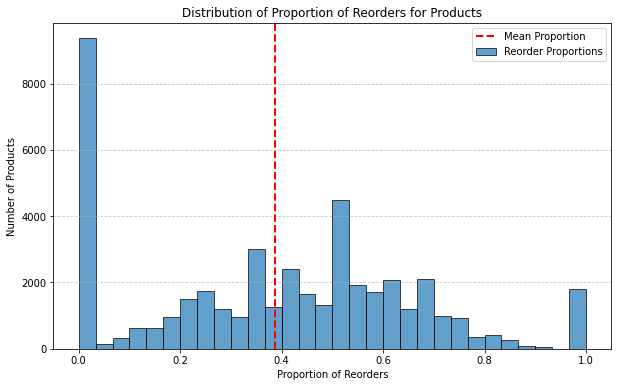

In [86]:
# Sort the DataFrame by proportion in descending order
proportions = proportions.sort_values(by='proportion', ascending=False)

# Create a histogram to visualize the distribution of reorder proportions
plt.figure(figsize=(10, 6))
plt.hist(proportions['proportion'], bins=30, edgecolor='k', alpha=0.7, label='Reorder Proportions')
plt.axvline(proportions['proportion'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Proportion')
plt.xlabel('Proportion of Reorders')
plt.ylabel('Number of Products')
plt.title('Distribution of Proportion of Reorders for Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

From the information provided we can see our average proportions is about 0.4.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [87]:
# Merge df5 with df on 'user_id' using 'order_id' as the key
merged_df = df5.merge(df[['order_id', 'user_id']], on='order_id', how='inner')

# Calculate the total number of products ordered by each customer
total_products_per_customer = merged_df.groupby('user_id')['product_id'].count()


In [88]:
# Calculate the number of reorder events by each customer
reorder_events_per_customer = merged_df.groupby('user_id')['reordered'].sum()

# Calculate the proportion of products ordered by each customer that are reorders
proportion_reorders_per_customer = (reorder_events_per_customer / total_products_per_customer).fillna(0)

In [89]:
# Reset the index for better readability
proportion_reorders_per_customer = proportion_reorders_per_customer.reset_index(name='proportion')

# Display the proportion of reorders for each customer with their user_id
print(proportion_reorders_per_customer)

        user_id  proportion
0             2    0.038462
1             4    0.000000
2             5    0.666667
3             6    0.000000
4             7    0.928571
...         ...         ...
149621   206203    0.222222
149622   206206    0.714286
149623   206207    0.891304
149624   206208    0.696000
149625   206209    0.320000

[149626 rows x 2 columns]


In [90]:
# Calculate the mean of the proportion of reorders
mean_proportion_reorders = proportion_reorders_per_customer.mean()

# Display the mean proportion of reorders
print("Mean Proportion of Reorders:", mean_proportion_reorders)

Mean Proportion of Reorders: user_id       103205.167778
proportion         0.494853
dtype: float64


The average proportion of products ordered that are reordered is 0.49.

### [C5] What are the top 20 items that people put in their carts first? 

In [91]:
# Merge df5 and df2 on 'product_id'
merged_df = pd.merge(df5, df2, on='product_id', how='inner')

In [92]:
# Filter to include only first items in the cart
first_items = merged_df[merged_df['add_to_cart_order'] == 1]


In [93]:
# Calculate the frequency of each product being added first
top_20_first_items = first_items['product_name'].value_counts().head(20)

In [94]:
print(top_20_first_items)

banana                         15562
bag of organic bananas         11026
organic whole milk              4363
organic strawberries            3946
organic hass avocado            3390
organic baby spinach            3336
organic avocado                 3044
spring water                    2336
strawberries                    2308
organic raspberries             2024
sparkling water grapefruit      1914
organic half & half             1797
large lemon                     1737
soda                            1733
organic reduced fat milk        1397
limes                           1370
hass avocados                   1340
organic reduced fat 2% milk     1310
half & half                     1309
raspberries                     1246
Name: product_name, dtype: int64


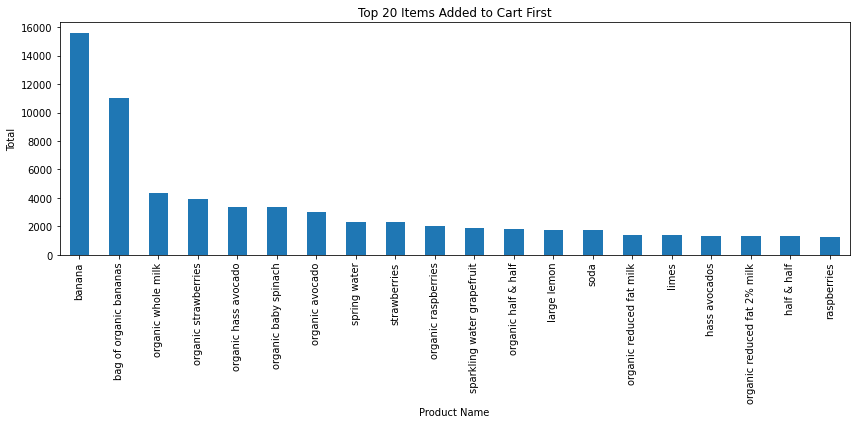

In [95]:
# Create a bar chart
plt.figure(figsize=(12, 6))
top_20_first_items.plot(kind='bar')
plt.title('Top 20 Items Added to Cart First')
plt.xlabel('Product Name')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()

I have added a chart with the top 20 items that are added to the cart first. Bananas once again being the most popular item. A visualization was added to make it clearer.

<span style="font-family: Arial; font-size: 35px;">Conclusion</span>

In conclusion with this data I have found that currently Bananas are our overall top selling item and have the highest reorder rate. Additionally Sunday is one of our better times for shopping in general. My general suggestions that can be inferred regarding this data is marketing may want to be added for other types of items or creating discounts to increase sales, alongside encouraging customers to come during the mdidle of the week for an increase in sales.